Importing Packages

In [2]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tifffile import imsave
import random
import splitfolders
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical 

scaler = MinMaxScaler()


Loading Dataset for preprocessing 

In [4]:
TRAIN_DATASET_PATH = 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

sample_flair_image = nib.load(TRAIN_DATASET_PATH + '/BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(sample_flair_image.max())


1854.603271484375


In [5]:
sample_flair_image.shape

(240, 240, 155)

In [6]:
sample_flair_image=scaler.fit_transform(sample_flair_image.reshape(-1, sample_flair_image.shape[-1])).reshape(sample_flair_image.shape)


sample_test_image_t1=nib.load(TRAIN_DATASET_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
sample_test_image_t1=scaler.fit_transform(sample_test_image_t1.reshape(-1, sample_test_image_t1.shape[-1])).reshape(sample_test_image_t1.shape)

sample_test_image_t1ce=nib.load(TRAIN_DATASET_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
sample_test_image_t1ce=scaler.fit_transform(sample_test_image_t1ce.reshape(-1, sample_test_image_t1ce.shape[-1])).reshape(sample_test_image_t1ce.shape)

sample_test_image_t2=nib.load(TRAIN_DATASET_PATH + '/BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(sample_test_image_t2.reshape(-1, sample_test_image_t2.shape[-1])).reshape(sample_test_image_t2.shape)

sample_test_mask=nib.load(TRAIN_DATASET_PATH + '/BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
sample_test_mask=sample_test_mask.astype(np.uint8)


In [7]:
print(np.unique(sample_test_mask))  
sample_test_mask[sample_test_mask==4] = 3 
print(np.unique(sample_test_mask)) 

[0 1 2 4]
[0 1 2 3]


Visualizing the sample Image Along with Mask

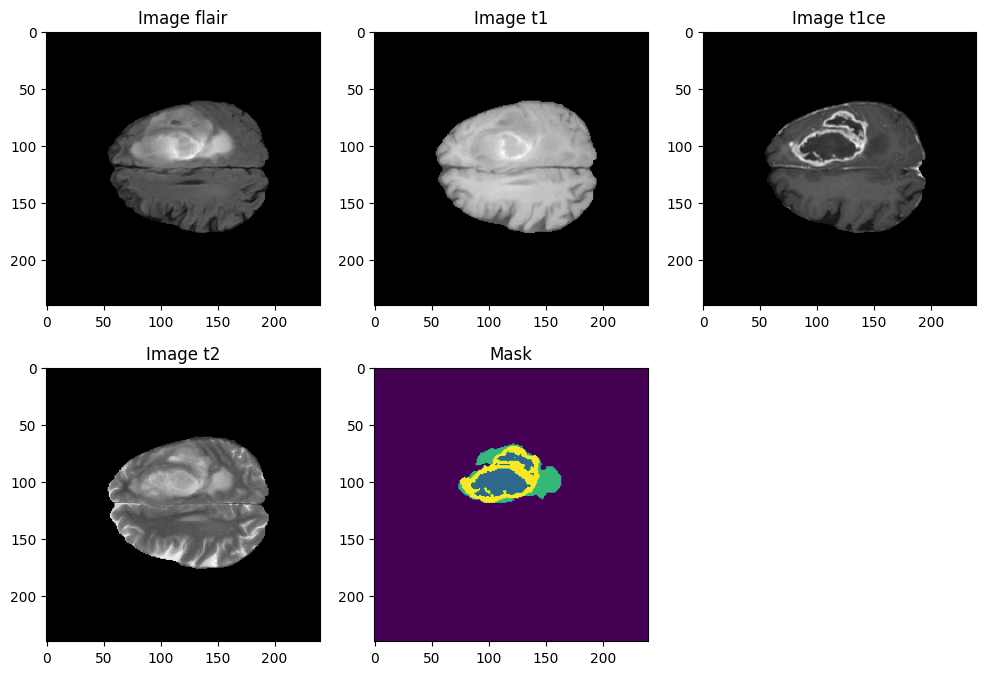

In [8]:
import random
n_slice=random.randint(0, sample_test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(sample_flair_image[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(sample_test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(sample_test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(sample_test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(sample_test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()


In [9]:

combined_x = np.stack([sample_flair_image, sample_test_image_t1ce, sample_test_image_t2], axis=3)

combined_x = combined_x[56:184, 56:184, 13:141]    #Cropped to 128x128x128x4 

sample_test_mask = sample_test_mask[56:184, 56:184, 13:141]

print("Shape of combined_x :",combined_x.shape)
print("Shape of combined mask:",sample_test_mask.shape)

Shape of combined_x : (128, 128, 128, 3)
Shape of combined mask: (128, 128, 128)


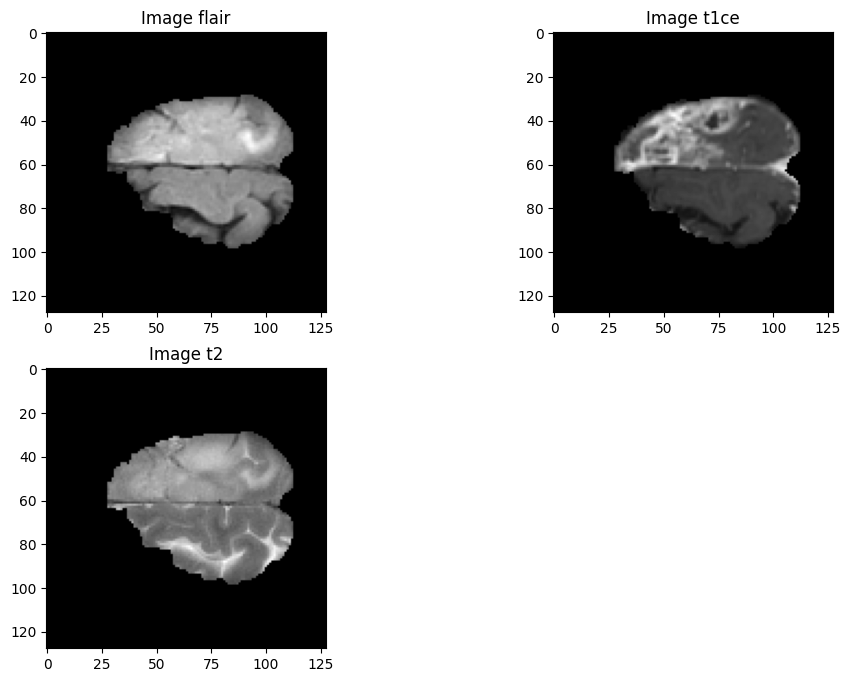

In [10]:
n_slice=random.randint(0, sample_test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.show()

In [11]:

t2_images = sorted(glob.glob('Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_images = sorted(glob.glob('Dataset//BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_images = sorted(glob.glob('Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
segmentation_masks = sorted(glob.glob('Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

scaler = MinMaxScaler()

sample_mask_categorical = to_categorical(sample_test_mask, num_classes=4)



In [12]:
t2_images

['Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_001\\BraTS20_Training_001_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_002\\BraTS20_Training_002_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_003\\BraTS20_Training_003_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_004\\BraTS20_Training_004_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_005\\BraTS20_Training_005_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_006\\BraTS20_Training_006_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_007\\BraTS20_Training_007_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_008\\BraTS20_Training_008_t2.nii',
 'Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_

In [13]:

for idx in range(len(t2_images)):  

    print(f"Processing image and mask number: {idx}")

    t2_img = nib.load(t2_images[idx]).get_fdata()
    t2_img = scaler.fit_transform(t2_img.reshape(-1, t2_img.shape[-1])).reshape(t2_img.shape)

    t1ce_img = nib.load(t1ce_images[idx]).get_fdata()
    t1ce_img = scaler.fit_transform(t1ce_img.reshape(-1, t1ce_img.shape[-1])).reshape(t1ce_img.shape)

    flair_img = nib.load(flair_images[idx]).get_fdata()
    flair_img = scaler.fit_transform(flair_img.reshape(-1, flair_img.shape[-1])).reshape(flair_img.shape)

    mask_img = nib.load(segmentation_masks[idx]).get_fdata()
    mask_img = mask_img.astype(np.uint8)
    mask_img[mask_img == 4] = 3  

    combined_modalities = np.stack([flair_img, t1ce_img, t2_img], axis=3)

    combined_modalities = combined_modalities[56:184, 56:184, 13:141]
    mask_img = mask_img[56:184, 56:184, 13:141]

    unique_labels, label_counts = np.unique(mask_img, return_counts=True)
    print("unique labels and label counts : ",(unique_labels,label_counts))

    if (1 - (label_counts[0] / label_counts.sum())) > 0.01:
        print("Saving data...")
        mask_img = to_categorical(mask_img, num_classes=4)
        np.save(f'Final_dataset/processed_data/images/image_{idx}.npy', combined_modalities)
        np.save(f'Final_dataset/processed_data/masks/mask_{idx}.npy', mask_img)
    else:
        print("Skipping: Insufficient labeled regions.")



Processing image and mask number: 0
unique labels and label counts :  (array([0, 1, 2, 3], dtype=uint8), array([1886119,   15443,  167848,   27742], dtype=int64))
Saving data...
Processing image and mask number: 1
unique labels and label counts :  (array([0, 1, 2, 3], dtype=uint8), array([2030146,    9160,   51297,    6549], dtype=int64))
Saving data...
Processing image and mask number: 2
unique labels and label counts :  (array([0, 1, 2, 3], dtype=uint8), array([2067345,     733,   26076,    2998], dtype=int64))
Saving data...
Processing image and mask number: 3
unique labels and label counts :  (array([0, 1, 2, 3], dtype=uint8), array([2001186,    9900,   72147,   13919], dtype=int64))
Saving data...
Processing image and mask number: 4
unique labels and label counts :  (array([0, 1, 2, 3], dtype=uint8), array([2077729,    3339,    6218,    9866], dtype=int64))
Skipping: Insufficient labeled regions.
Processing image and mask number: 5
unique labels and label counts :  (array([0, 1, 2

In [14]:
input_dir = 'Final_dataset\processed_data'
output_dir = 'Final_dataset\processed_data\split_data'

splitfolders.ratio(input_dir, output=output_dir, seed=42, ratio=(0.75, 0.25), group_prefix=None)  


Copying files: 688 files [15:05,  1.32s/ files]


Importing Packages

In [1]:
import os
import random
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tifffile import imsave
import segmentation_models_3D as sm
import keras
import tensorflow.keras.backend as K
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Loading Data

In [4]:

def load_images(directory, file_list):
    images = []
    for file_name in file_list:
        if file_name.endswith('.npy'):
            image = np.load(os.path.join(directory, file_name))
            images.append(image)
    return np.array(images)


def data_generator(image_dir, image_list, mask_dir, mask_list, batch_size):
    total_images = len(image_list)

    while True:
        start = 0
        end = batch_size

        while start < total_images:
            limit = min(end, total_images)
            batch_images = load_images(image_dir, image_list[start:limit])
            batch_masks = load_images(mask_dir, mask_list[start:limit])

            yield (batch_images, batch_masks)

            start += batch_size
            end += batch_size


train_image_dir = "/content/drive/MyDrive/Brain Tumor/split_data/train/images/"
train_mask_dir = "/content/drive/MyDrive/Brain Tumor/split_data/train/masks/"
train_image_list = os.listdir(train_image_dir)
train_mask_list = os.listdir(train_mask_dir)

val_image_dir = "/content/drive/MyDrive/Brain Tumor/split_data/val/images/"
val_mask_dir = "/content/drive/MyDrive/Brain Tumor/split_data/val/masks/"

val_image_list = os.listdir(val_image_dir)
val_mask_list = os.listdir(val_mask_dir)


In [5]:
batch_size = 2

train_data_datagen = data_generator(train_image_dir, train_image_list, train_mask_dir, train_mask_list, batch_size)
val_data_datagen = data_generator(val_image_dir, val_image_list,val_mask_dir, val_mask_list, batch_size)

image_batch, mask_batch = next(train_data_datagen)


print("Image shape: ",image_batch.shape)
print("Mask shape: ",mask_batch.shape)

Image shape:  (2, 128, 128, 128, 3)
Mask shape:  (2, 128, 128, 128, 4)


Plotting the Sample Training Image along with Mask

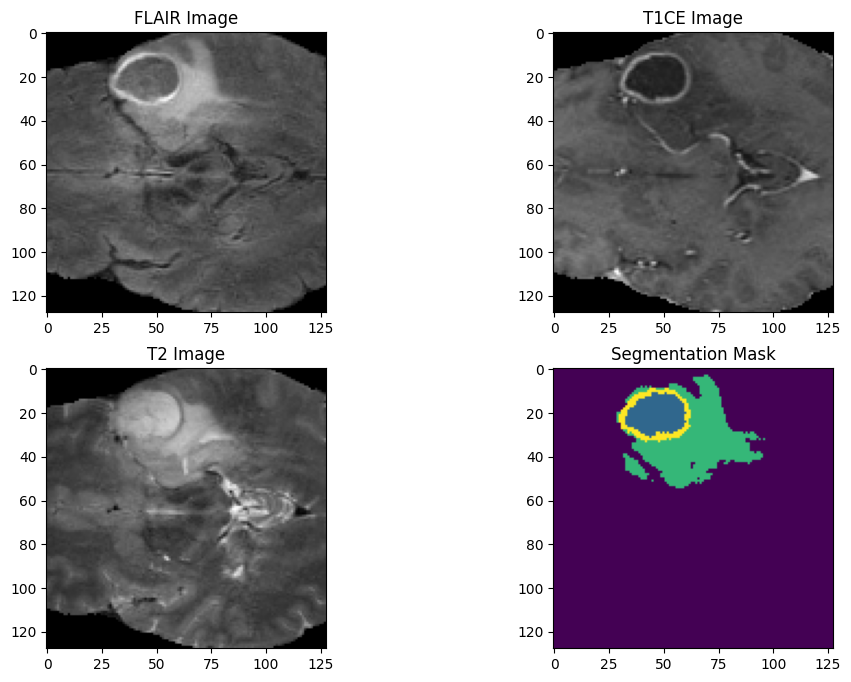

In [6]:

random_index = random.randint(0, image_batch.shape[0] - 1)
selected_image = image_batch[random_index]
selected_mask = np.argmax(mask_batch[random_index], axis=3)

random_slice = random.randint(0, selected_mask.shape[2] - 1)

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(selected_image[:, :, random_slice, 0], cmap='gray')
plt.title('FLAIR Image')

plt.subplot(222)
plt.imshow(selected_image[:, :, random_slice, 1], cmap='gray')
plt.title('T1CE Image')

plt.subplot(223)
plt.imshow(selected_image[:, :, random_slice, 2], cmap='gray')
plt.title('T2 Image')

plt.subplot(224)
plt.imshow(selected_mask[:, :, random_slice])
plt.title('Segmentation Mask')

plt.show()

Plotting sample validation image along with mask

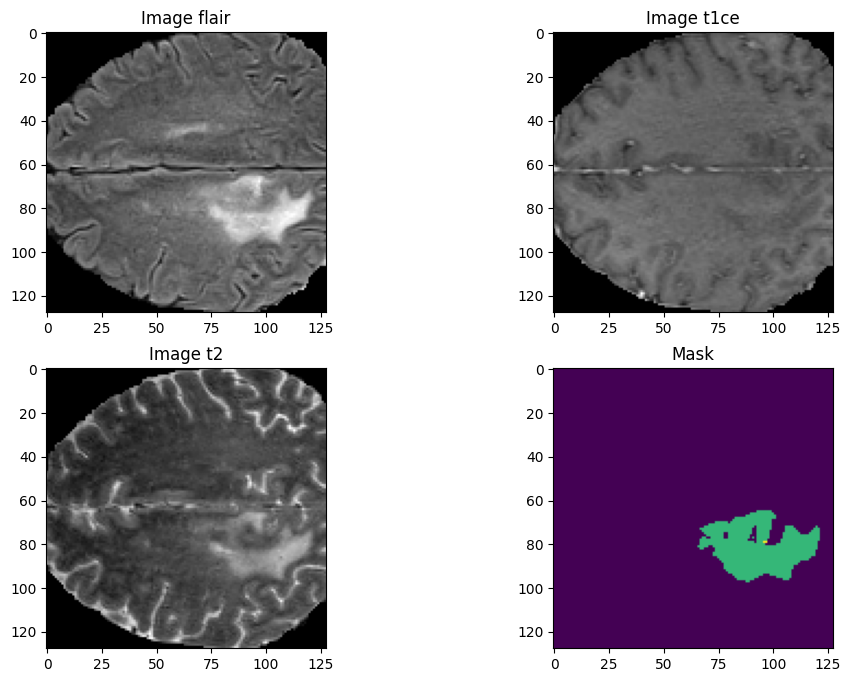

In [7]:

img, msk = val_data_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [9]:
pip install segmentation-models-3D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 3.3.3 which is incompatible.


Defining the Dice Loss,Focal Loss,Total Loss

In [10]:


wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)



def iou(y_true, y_pred, smooth=1e-6):
    y_pred = K.one_hot(K.argmax(y_pred, axis=-1), num_classes=K.shape(y_pred)[-1])
    y_true = K.one_hot(K.argmax(y_true, axis=-1), num_classes=K.shape(y_true)[-1])

    intersection = K.sum(K.cast(y_true * y_pred, "float32"), axis=[0,1,2])
    union = K.sum(K.cast(y_true, "float32"), axis=[0,1,2]) + K.sum(K.cast(y_pred, "float32"), axis=[0,1,2]) - intersection

    iou_score = K.mean((intersection + smooth) / (union + smooth))  
    return iou_score



def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true) 
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return - dice_coef(y_true, y_pred)




checkpoint = ModelCheckpoint("best_model.keras",
                             monitor="val_loss",
                             save_best_only=True,
                             mode="min",
                             verbose=1)

reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                              factor=0.5,
                              patience=3,
                              min_lr=1e-6,
                              verbose=1)

early_stopping = EarlyStopping(monitor="val_loss",
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

callbacks = [checkpoint, reduce_lr, early_stopping]



Segmentation Models: using `keras` framework.


Building the Model

In [11]:
import tensorflow as tf
from keras import layers, Model

def conv_block(x, filters, kernel_size=(3, 3, 3), strides=1):
    x = layers.Conv3D(filters, kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def residual_block(x, filters):
    res = x
    x = conv_block(x, filters)
    x = conv_block(x, filters)
    if res.shape[-1] != filters:
        res = layers.Conv3D(filters, (1, 1, 1), padding='same')(res)
    x = layers.Add()([x, res])
    return x


def encoder_block(x, filters):
    x = residual_block(x, filters)
    p = layers.Conv3D(filters, (2, 2, 2), strides=2, padding='same')(x)
    return x, p

def decoder_block(x, skip, filters):

    x = layers.Conv3DTranspose(filters, (2, 2, 2), strides=2, padding='same')(x)
    x = layers.Concatenate()([x, skip])
    x = residual_block(x, filters)
    return x

def build_vnet(input_shape=(128, 128, 128, 3), num_classes=4):
    inputs = layers.Input(input_shape)


    s1, p1 = encoder_block(inputs, 16)
    s2, p2 = encoder_block(p1, 32)
    s3, p3 = encoder_block(p2, 64)
    s4, p4 = encoder_block(p3, 128)


    b = residual_block(p4, 256)


    d1 = decoder_block(b, s4, 128)
    d2 = decoder_block(d1, s3, 64)
    d3 = decoder_block(d2, s2, 32)
    d4 = decoder_block(d3, s1, 16)


    outputs = layers.Conv3D(num_classes, (1, 1, 1), activation='softmax')(d4)

    model = Model(inputs, outputs, name="V-Net")
    return model

model = build_vnet(input_shape=(128, 128, 128, 3), num_classes=4)
model.summary()


Model: "V-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 128,  │              0 │ -                      │
│                           │ 3)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d (Conv3D)           │ (None, 128, 128, 128,  │          1,312 │ input_layer[0][0]      │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 128,  │             64 │ conv3d[0][0]           │
│ (BatchNormalization)      │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 128, 128, 128,  │              0 │ batch_normalization[0… │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_1 (Conv3D)         │ (None, 128, 128, 128,  │          6,928 │ re_lu[0][0]            │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 128,  │             64 │ conv3d_1[0][0]         │
│ (BatchNormalization)      │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 128, 128, 128,  │              0 │ batch_normalization_1… │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_2 (Conv3D)         │ (None, 128, 128, 128,  │             64 │ input_layer[0][0]      │
│                           │ 16)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 128, 128, 128,  │              0 │ re_lu_1[0][0],         │
│                           │ 16)                    │                │ conv3d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_3 (Conv3D)         │ (None, 64, 64, 64, 16) │          2,064 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_4 (Conv3D)         │ (None, 64, 64, 64, 32) │         13,856 │ conv3d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64, 32) │            128 │ conv3d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 64, 64, 64, 32) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_5 (Conv3D)         │ (None, 64, 64, 64, 32) │         27,680 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3

 Total params: 5,913,860 (22.56 MB)

 Trainable params: 5,910,916 (22.55 MB)

 Non-trainable params: 2,944 (11.50 KB)

Compiling the Model

In [12]:
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4), loss=total_loss, metrics=['accuracy',iou, dice_coef])


Training the Model

In [13]:
batch_size = 2
steps_per_epoch = len(train_image_list) // batch_size
val_steps = len(val_image_list) // batch_size

history = model.fit(
    train_data_datagen,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data_datagen,
    validation_steps=val_steps,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4549 - dice_coef: 0.4123 - iou: 0.1766 - loss: 1.0196
Epoch 1: val_loss improved from inf to 0.94985, saving model to best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 844s 6s/step - accuracy: 0.4571 - dice_coef: 0.4144 - iou: 0.1778 - loss: 1.0191 - val_accuracy: 0.9504 - val_dice_coef: 0.9110 - val_iou: 0.5810 - val_loss: 0.9498 - learning_rate: 1.0000e-04
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.9703 - dice_coef: 0.9662 - iou: 0.5907 - loss: 0.8742
Epoch 2: val_loss improved from 0.94985 to 0.92290, saving model to best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9703 - dice_coef: 0.9662 - iou: 0.5908 - loss: 0.8742 - val_accuracy: 0.9563 - val_dice_coef: 0.9549 - val_iou: 0.6038 - val_loss: 0.9229 - learning_rate: 1.0000e-04
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9755 - dice_coef: 0.9731 - iou: 0.6510 - loss: 0.8554
Epoch 3: val_loss improved 

Saving the Model

In [14]:
model.save("/content/drive/MyDrive/Brain Tumor/v_net.h5")

In [17]:
model.save("/content/drive/MyDrive/Brain Tumor/v_net_keras.keras")

In [19]:
model.save_weights("/content/drive/MyDrive/Brain Tumor/v_net_weights.weights.h5")

Loading the saved Model

In [ ]:
my_model = load_model('/content/best_model.keras',
                      compile=False)

Evaluating the Model

In [20]:
results = model.evaluate(val_data_datagen, steps=val_steps)


43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 294ms/step - accuracy: 0.9759 - dice_coef: 0.9745 - iou: 0.6985 - loss: 0.8518


In [47]:
loss, accuracy, dice_coef, iou = results
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy*100}")
print(f"Validation Dice Coefficient: {dice_coef}")
print(f"Validation IoU: {iou*100}")


Validation Loss: 0.854825496673584
Validation Accuracy: 96.88279628753662
Validation Dice Coefficient: 0.6885626316070557
Validation IoU: 96.7212438583374


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import random

model = load_model("/content/best_model.keras", compile=False)


In [21]:
import numpy as np
import matplotlib.pyplot as plt

custom_colors = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

cmap = plt.cm.colors.ListedColormap(custom_colors)


Plotting the Predicted mask along with Actual Mask for a test Sample

In [22]:
def predict_and_visualize(model, test_image_path, test_mask_path):
    test_image = np.load(test_image_path)
    test_mask = np.load(test_mask_path)

    test_image = np.expand_dims(test_image, axis=0)
    test_mask = np.argmax(test_mask, axis=-1)

    predicted_mask = model.predict(test_image)
    predicted_mask = np.argmax(predicted_mask, axis=-1)[0]

    slice_idx = random.randint(0, test_mask.shape[2] - 1)

    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.imshow(test_image[0, :, :, slice_idx, 0], cmap='gray')
    plt.title('Image flair')

    plt.subplot(232)
    plt.imshow(test_image[0, :, :, slice_idx, 1], cmap='gray')
    plt.title('Image t1ce')

    plt.subplot(233)
    plt.imshow(test_image[0, :, :, slice_idx, 2], cmap='gray')
    plt.title('Image t2')

    plt.subplot(234)
    plt.imshow(test_mask[:, :, slice_idx], cmap=cmap)
    plt.title('Actual Mask')

    plt.subplot(235)
    plt.imshow(predicted_mask[:, :, slice_idx], cmap=cmap)
    plt.title('Predicted Mask')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


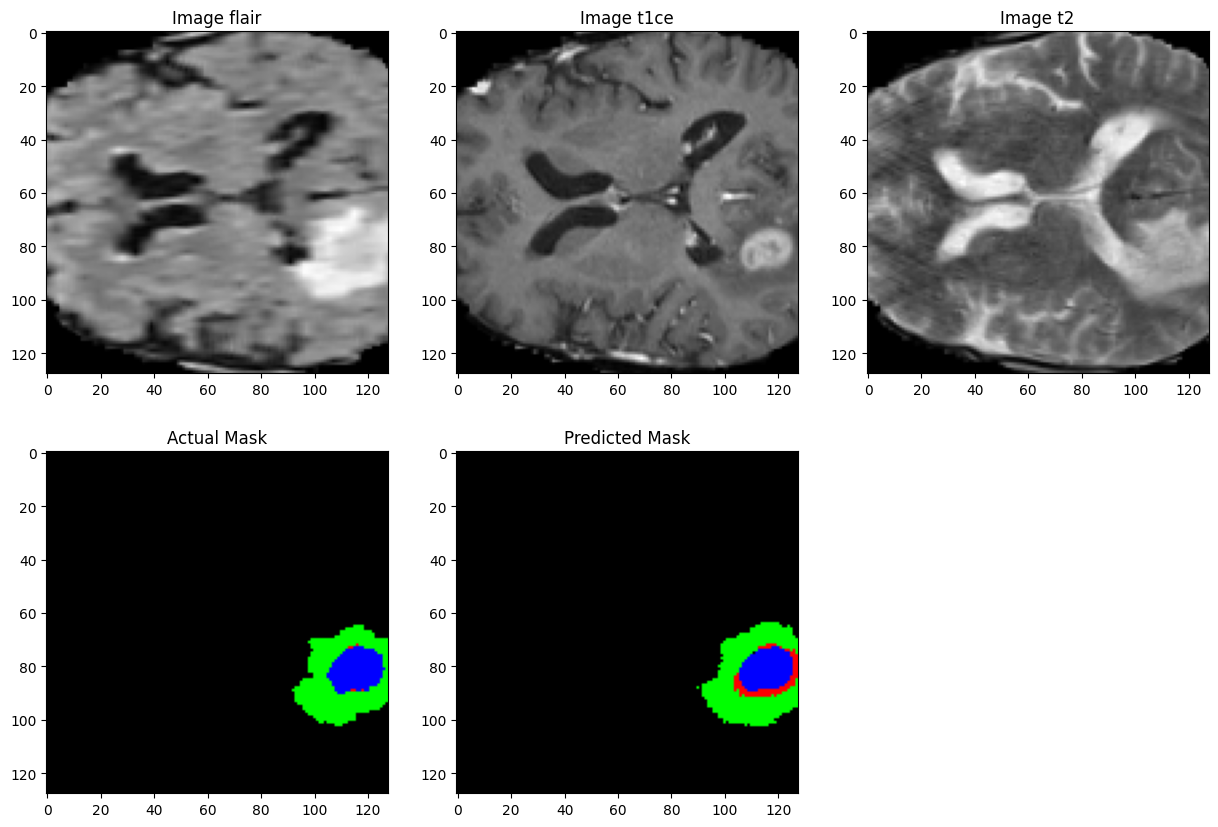

In [28]:
test_image_path = "/content/drive/MyDrive/Brain Tumor/split_data/val/images/image_130.npy"
test_mask_path = "/content/drive/MyDrive/Brain Tumor/split_data/val/masks/mask_130.npy"

predict_and_visualize(model, test_image_path, test_mask_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


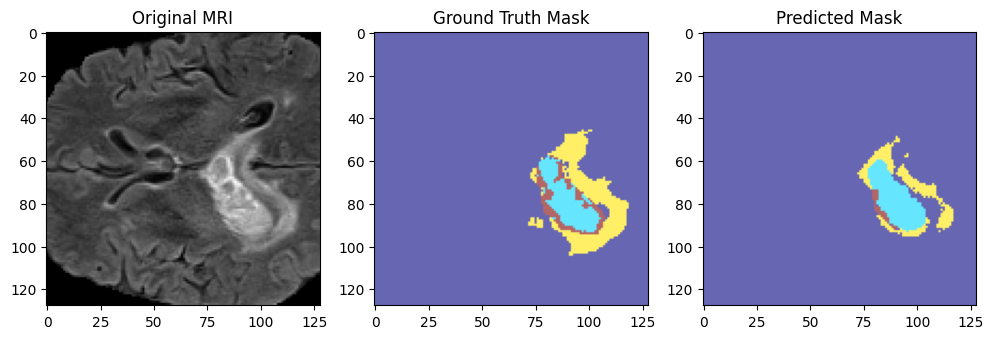

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_predictions(model, test_image, test_mask):
    pred_mask = model.predict(np.expand_dims(test_image, axis=0))[0]
    pred_mask = np.argmax(pred_mask, axis=-1)

    slice_idx = test_image.shape[2] // 2

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(test_image[:, :, slice_idx, 0], cmap='gray')
    plt.title('Original MRI')

    plt.subplot(1, 3, 2)
    plt.imshow(test_mask[:, :, slice_idx], cmap='jet', alpha=0.6)
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask[:, :, slice_idx], cmap='jet', alpha=0.6)
    plt.title('Predicted Mask')

    plt.show()

plot_sample_predictions(model, test_img, test_mask)


Plotting the Accuracy,Loss,IOU,Dice coefficient Accross Different Epochs

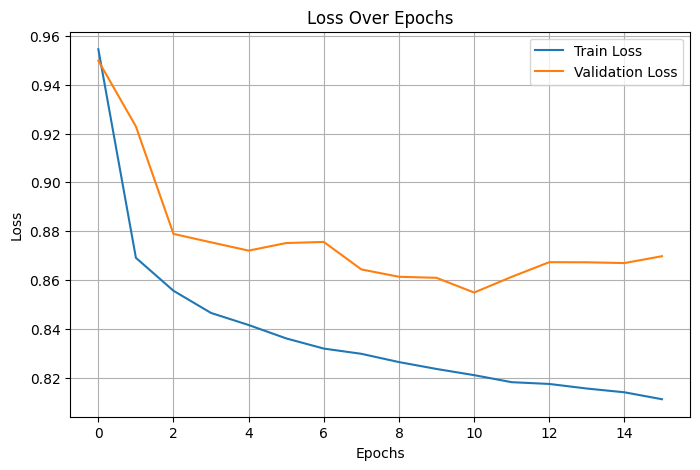

In [31]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()


plot_loss(history)


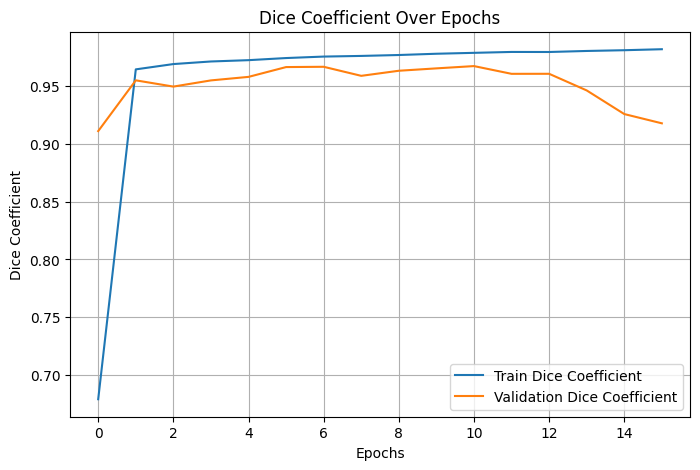

In [32]:
def plot_dice_coef(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['dice_coef'], label='Train Dice Coefficient')
    plt.plot(history.history['val_dice_coef'], label='Validation Dice Coefficient')
    plt.title('Dice Coefficient Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Dice Coefficient')
    plt.legend()
    plt.grid()
    plt.show()


plot_dice_coef(history)



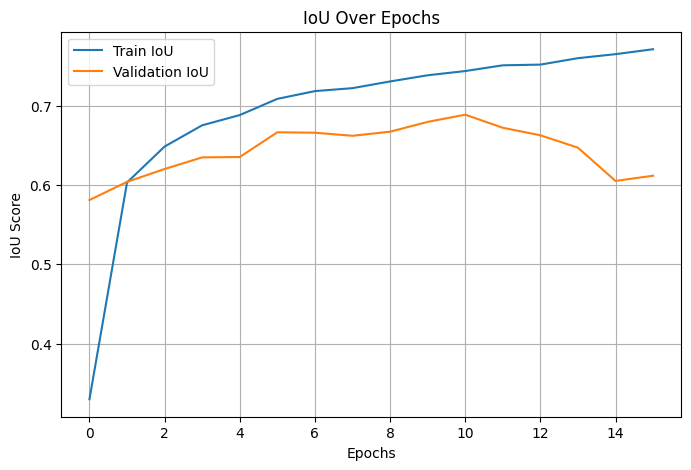

In [36]:
def plot_iou(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['iou'], label='Train IoU')
    plt.plot(history.history['val_iou'], label='Validation IoU')
    plt.title('IoU Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('IoU Score')
    plt.legend()
    plt.grid()
    plt.show()

plot_iou(history)

Survival Days Prediction Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder




In [3]:
data = pd.read_csv(r"/content/drive/MyDrive/brain_tumor/modified_survival_data.csv")

def calculate_tumor_volume(mask_path):
    mask = nib.load(mask_path)
    mask_data = mask.get_fdata()
    voxel_volume = np.prod(mask.header.get_zooms())
    tumor_volume = np.sum(mask_data > 0) * voxel_volume
    return tumor_volume


In [4]:
data.head()

,Unnamed: 0,Age,Survival_days,Extent_of_Resection,Tumor_Volume
0,0,60.463,289,0,211979.0
1,1,52.263,616,0,67008.0
2,2,54.301,464,0,29807.0
3,3,39.068,788,0,103496.0
4,4,68.493,465,0,21963.0


In [5]:
data["Extent_of_Resection"].unique()

array([0, 2, 1])

In [6]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  236 non-null    float64
 1   Survival_days        236 non-null    int64  
 2   Extent_of_Resection  236 non-null    int64  
 3   Tumor_Volume         236 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 7.5 KB


In [8]:
data.describe()

,Age,Survival_days,Extent_of_Resection,Tumor_Volume
count,236.000000,236.000000,236.000000,236.000000
mean,61.223203,445.453390,0.949153,91144.029661
std,11.874114,355.158044,0.979339,52534.151853
min,18.975000,5.000000,0.000000,7285.000000
25%,54.244250,190.000000,0.000000,45783.500000
50%,61.471000,369.000000,0.000000,84154.000000
75%,69.200000,579.250000,2.000000,129966.500000
max,86.652000,1767.000000,2.000000,227126.000000


In [10]:
data.isnull().sum()

,0
Age,0
Survival_days,0
Extent_of_Resection,0
Tumor_Volume,0


In [11]:
le = LabelEncoder()
data['Extent_of_Resection'] = le.fit_transform(data['Extent_of_Resection'].astype(str))

data['Extent_of_Resection'].fillna(data['Extent_of_Resection'].mode()[0], inplace=True)


<ipython-input-11-34578d3dc207>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Extent_of_Resection'].fillna(data['Extent_of_Resection'].mode()[0], inplace=True)


In [12]:
data.isnull().sum()

,0
Age,0
Survival_days,0
Extent_of_Resection,0
Tumor_Volume,0


In [13]:
data.head()

,Age,Survival_days,Extent_of_Resection,Tumor_Volume
0,60.463,289,0,211979.0
1,52.263,616,0,67008.0
2,54.301,464,0,29807.0
3,39.068,788,0,103496.0
4,68.493,465,0,21963.0


In [14]:
validation_df = pd.read_csv("/content/drive/MyDrive/brain_tumor/survival_evaluation.csv")

In [15]:
validation_df.head()

,BraTS20ID,Age,ResectionStatus
0,BraTS20_Validation_001,68.170,GTR
1,BraTS20_Validation_002,50.153,GTR
2,BraTS20_Validation_004,21.726,GTR
3,BraTS20_Validation_006,55.482,GTR
4,BraTS20_Validation_007,64.753,GTR


In [16]:
validation_df.isnull().sum()

,0
BraTS20ID,0
Age,0
ResectionStatus,0


In [17]:
validation_df['ResectionStatus'] = le.fit_transform(validation_df['ResectionStatus'].astype(str))


In [18]:
validation_df.head()

,BraTS20ID,Age,ResectionStatus
0,BraTS20_Validation_001,68.170,0
1,BraTS20_Validation_002,50.153,0
2,BraTS20_Validation_004,21.726,0
3,BraTS20_Validation_006,55.482,0
4,BraTS20_Validation_007,64.753,0


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import torch


X = data[['Age', 'Tumor_Volume','Extent_of_Resection']]
y = data['Survival_days']

scaler = MinMaxScaler()

X=scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)




In [20]:
y_pred

array([579.08, 319.93, 229.23, 652.82, 241.85, 693.81, 648.29, 740.17,
       334.  , 383.18, 302.19, 295.75, 554.24, 294.14, 109.49, 365.75,
       404.16, 292.08, 499.89, 393.28, 316.26, 408.94, 186.88, 174.73,
       354.73, 400.12, 188.13, 298.65, 344.07, 335.9 , 956.01, 299.88,
       507.52, 520.08, 570.84, 186.49, 165.26, 708.96, 194.89, 353.88,
       442.85, 184.42, 172.56, 618.95, 323.3 , 621.3 , 447.23, 210.72])

In [24]:
from tensorflow.keras import backend as K
import segmentation_models_3D as sm
import numpy as np

wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)



def iou(y_true, y_pred, smooth=1e-6):
    y_pred = K.one_hot(K.argmax(y_pred, axis=-1), num_classes=K.shape(y_pred)[-1])
    y_true = K.one_hot(K.argmax(y_true, axis=-1), num_classes=K.shape(y_true)[-1])

    intersection = K.sum(K.cast(y_true * y_pred, "float32"), axis=[0,1,2])
    union = K.sum(K.cast(y_true, "float32"), axis=[0,1,2]) + K.sum(K.cast(y_pred, "float32"), axis=[0,1,2]) - intersection

    iou_score = K.mean((intersection + smooth) / (union + smooth))
    return iou_score



def dice_coef(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return - dice_coef(y_true, y_pred)


In [23]:
from keras.models import load_model
vnet_model = load_model('/content/drive/MyDrive/brain_tumor/vnet_model.h5',
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


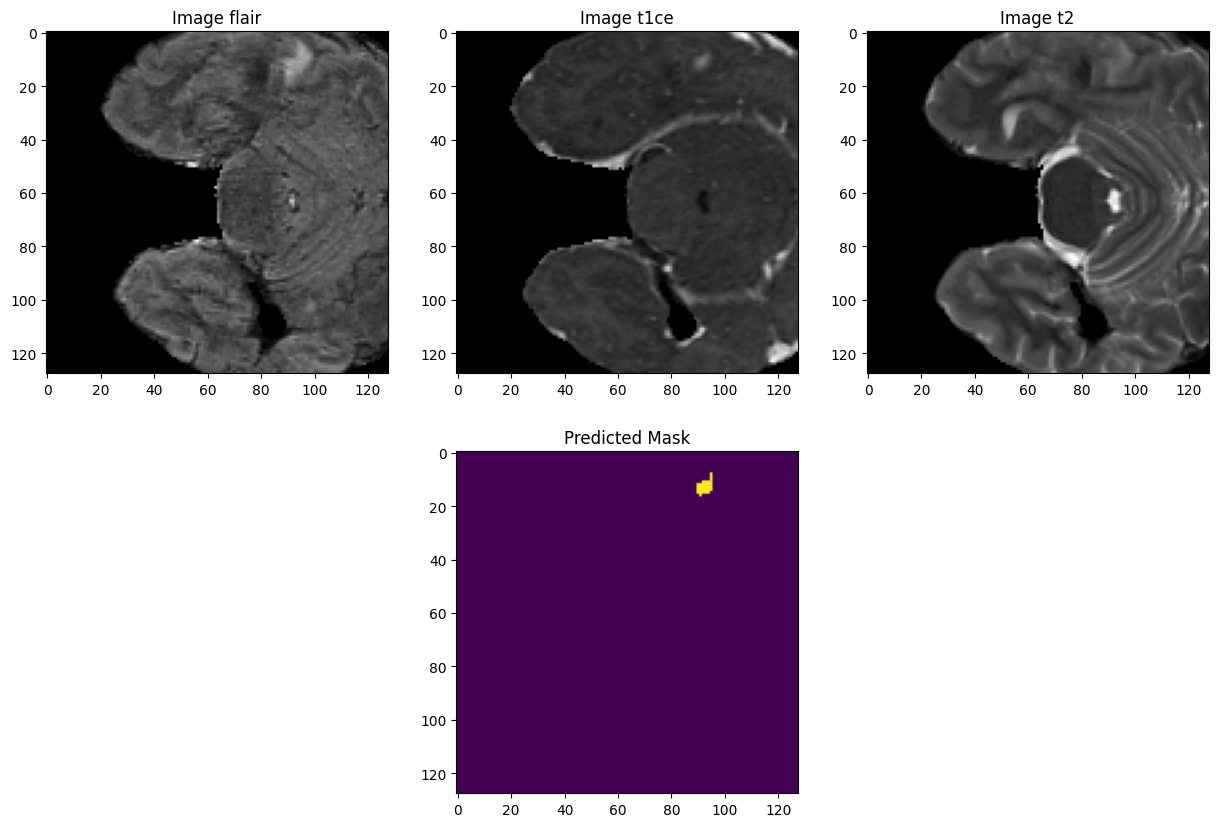

In [45]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings("ignore")



def predict_survival(test_image_path, brats_id):
    age = validation_df.loc[validation_df['BraTS20ID'] == brats_id, 'Age'].values[0]
    resection_status = validation_df.loc[validation_df['BraTS20ID'] == brats_id, 'ResectionStatus'].values[0]
    test_image = np.load(test_image_path)


    test_image = np.expand_dims(test_image, axis=0)

    predicted_mask = vnet_model.predict(test_image)
    predicted_mask = np.argmax(predicted_mask, axis=-1)[0]

    slice_idx = random.randint(0, 150)

    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.imshow(test_image[0, :, :, slice_idx, 0], cmap='gray')
    plt.title('Image flair')

    plt.subplot(232)
    plt.imshow(test_image[0, :, :, slice_idx, 1], cmap='gray')
    plt.title('Image t1ce')

    plt.subplot(233)
    plt.imshow(test_image[0, :, :, slice_idx, 2], cmap='gray')
    plt.title('Image t2')


    plt.subplot(235)
    plt.imshow(predicted_mask[:, :, slice_idx])
    plt.title('Predicted Mask')

    plt.show()

    mask_path = f"/content/drive/MyDrive/brain_tumor/predicted_masks/{brats_id}_seg.nii"
    nib.save(nib.Nifti1Image(predicted_mask.astype(np.uint8), np.eye(4)), mask_path)


    tumor_volume = calculate_tumor_volume(mask_path)

    input_features = np.array([[age, tumor_volume,resection_status]])
    input_features_scaled = scaler.transform(input_features)

    predicted_survival_days = rf_model.predict(input_features_scaled)[0]

    return predicted_survival_days


test_image_path = "/content/drive/MyDrive/brain_tumor/BraTS20_Validation_008/image_110.npy"
brats_id = "BraTS20_Validation_110"
predicted_survival = predict_survival(test_image_path, brats_id)


In [46]:
print(f"Predicted Survival Days: {predicted_survival}")


Predicted Survival Days: 585.2
